### 1. Import the necessary libraries

In [4]:
#Import relevant Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="darkgrid")
import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro
from statsmodels.stats.power import ttest_power

### 2. Read the data as a data frame

In [5]:
insurance_df = pd.read_csv("insurance (2).csv")

### 3. Perform basic EDA which should include the following and print out your insights at every step

### Check the head of the DataFrame!

In [6]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


### a. Shape of the data

In [71]:
print("Shape of Dataframe is ",insurance_df.shape)

Shape of Dataframe is  (1338, 7)


### b. Data type of each attribute

In [74]:
print("Type of each attribute of Dataframe is\n",insurance_df.dtypes)

Type of each attribute of Dataframe is
 age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


### c. Checking the presence of missing values

In [76]:
print("Checking if dataframe has missing values, and if so how many\n",insurance_df.isnull().sum())

Checking if dataframe has missing values, and if so how many
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


### Insight 1: Dataframe does not consist of a single missing value

<font color='blue'>

### d. 5 point summary of numerical attributes

In [79]:
print("The 5 point Summary of Numeric Attributes is\n",insurance_df.describe())

The 5 point Summary of Numeric Attributes is
                age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


### Insights from 5 Point Summary
a) Insurance provided only from age 18 to age 64. So insurance data only covers adults

b) Median and Mean BMI is >30 which indicates approx. 50% or more are Obese

### e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

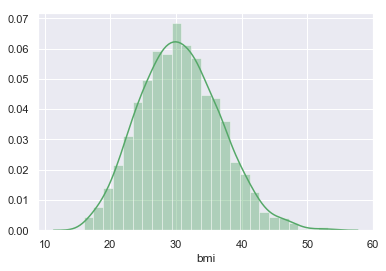

In [11]:
sns.set_color_codes()
sns.distplot(insurance_df['bmi'],color='g' )

### Insight 3 
BMI is normally distributed with higher mean BMI of 30 (Approx)

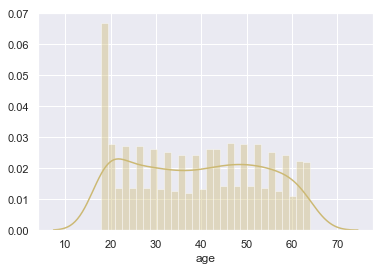

In [12]:
sns.distplot(insurance_df['age'],color='y' , bins=30)

### Insight 4
Number of People opting for insurance with age below 20 is significantly higher

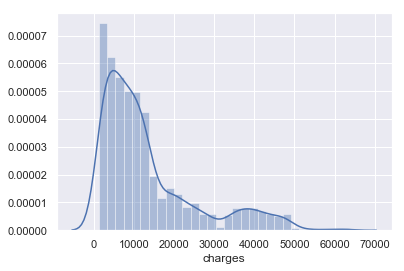

In [14]:
sns.distplot(insurance_df['charges'] )

### Insight 5
Charges are right skewed with lower charges dominating the distribution

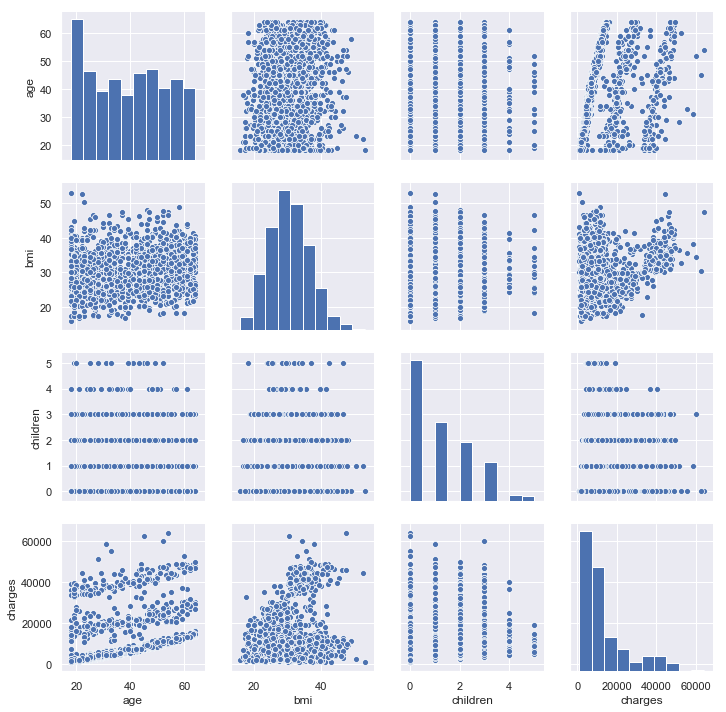

In [15]:
sns.pairplot(insurance_df)

### Insight 6
No real co-relation exists between variables as suggested by pairplot, however on an average charges tend to increase with age

### f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [81]:
print("Skewness of BMI, Age, Charges are \n",insurance_df[['age', 'bmi','charges']].skew(axis=0))

Skewness of BMI, Age, Charges are 
 age        0.055673
bmi        0.284047
charges    1.515880
dtype: float64


### Insight 7
As indicated above, age is normally distributed, charges is right skewed and bmi is left skewed

### g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

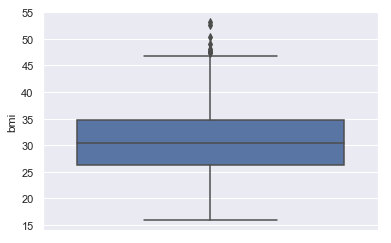

In [17]:
sns.boxplot(y=insurance_df['bmi'])

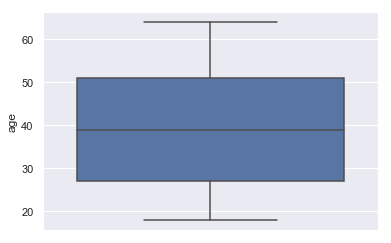

In [18]:
sns.boxplot(y=insurance_df['age'])

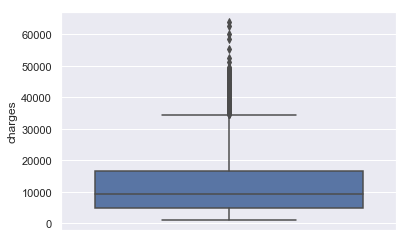

In [19]:
sns.boxplot(y=insurance_df['charges'])

### The Box Plot does show presence of outliers especially in the charges attribute. Lets see how many are outliers

In [20]:
from scipy import stats

In [21]:
Q1 = insurance_df.quantile(0.25)
Q3 = insurance_df.quantile(0.75)
#Inter Quartile Range
IQR = Q3 - Q1
print(IQR)

age            24.000000
bmi             8.397500
children        2.000000
charges     11899.625365
dtype: float64


In [ ]:
# Check for Outliers at both ends. This generates a dataframe with outlier values which are numbric
# All Others are NaN

In [22]:
filter_df = (insurance_df < (Q1 - 1.5 * IQR)) |(insurance_df > (Q3 + 1.5 * IQR))

In [ ]:
# Drop all rows that doesn't have even 1 Outlier. We find that only BMI and Charges fields have Outliers. 

In [87]:
outliers= insurance_df[filter_df].dropna(thresh=1)
outliers.count()

age           0
sex           0
bmi           9
children      0
smoker        0
region        0
charges     139
dtype: int64

In [83]:
outliers.count().bmi

9

In [24]:
outliers.count().charges

139

### h.Distribution of categorical columns (include children)

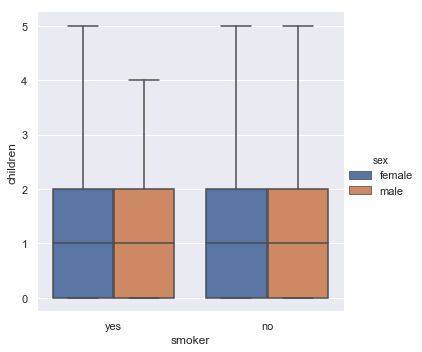

In [93]:
sns.catplot(x="smoker", y="children", hue="sex", kind="box", data=insurance_df)

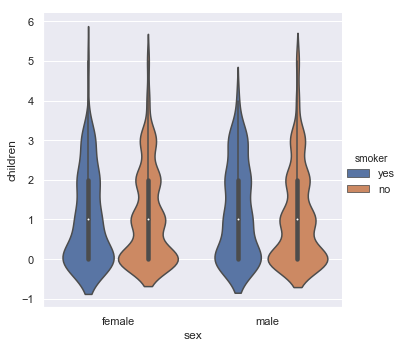

In [73]:
sns.catplot(x="sex", y="children", hue="smoker", kind="violin", data=insurance_df)

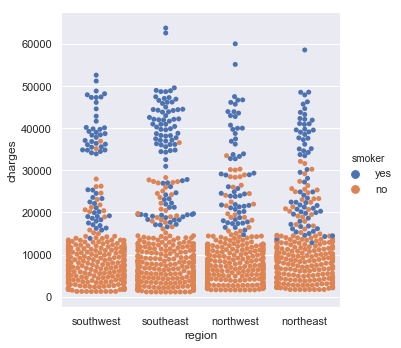

In [72]:
sns.catplot(x="region", y="charges", hue="smoker", kind="swarm", data=insurance_df)

### Insight 8: Smokers tend to pay higher than non smokers irrespective of the region

### i. Pair plot that includes all the columns of the data frame

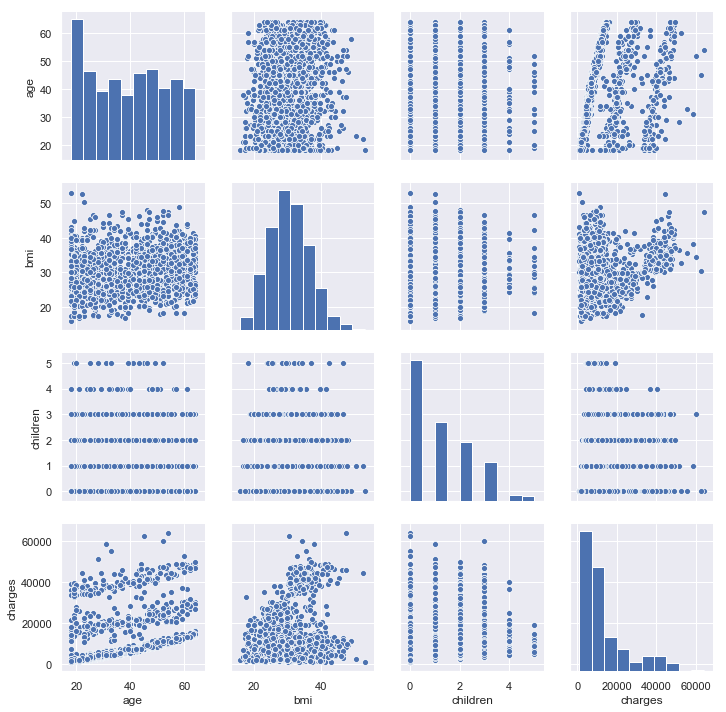

In [26]:
sns.pairplot(insurance_df)

### Insight 7
No real co-relation exists between variables as suggested by pairplot, however on an average charges tend to increase with age

### 4. Answer the following questions with statistical evidence

### a. Do charges of people who smoke differ significantly from the people who don't?

In [87]:
# Seperating the data into 2 groups
group1 = insurance_df['smoker'] == 'yes'
group1 = insurance_df[group1]['charges']
group2 = insurance_df['smoker'] == 'no'
group2 = insurance_df[group2]['charges']

In [88]:
# two-sample t-test
# null hypothesis: the two groups have the similar mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)
# independent groups: e.g., how insurance charges for smokers and non-smokers vary 
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


In [89]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 8.271435842177219e-283


In [90]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U - Used when samples are not normally distributed
u, p_value = mannwhitneyu(group1, group2)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 2.6351167222517853e-130


### Insight 8 The small p-value indicates that alternate hypothesis is true and the fact that charges for insurance varies significantly between smokers and non smokers

### b. Does bmi of males differ significantly from that of females?

In [105]:
# Seperating the data into 2 groups
group1 = insurance_df['sex'] == 'male'
group1 = insurance_df[group1]['bmi']
group2 = insurance_df['sex'] == 'female'
group2 = insurance_df[group2]['bmi']


In [106]:
# two-sample t-test
# null hypothesis: the two groups have the similar mean
# this test assumes the two groups have the same variance...
# (can be checked with tests for equal variance - Levene)
# independent groups: e.g., how bmi varies for males and females 
t_statistic, p_value = ttest_ind(group1, group2)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


In [107]:
# p_value < 0.05 => alternative hypothesis:
# they don't have the same mean at the 5% significance level
print ("two-sample t-test p-value=", p_value)

two-sample t-test p-value= 0.08997637178984932


In [108]:
# two-sample wilcoxon test
# a.k.a Mann Whitney U - Used when samples are not normally distributed
u, p_value = mannwhitneyu(group1, group2)
print ("two-sample wilcoxon-test p-value=", p_value)

two-sample wilcoxon-test p-value= 0.05070064020142721


### Insight 9: As p value is > 5%, we cannot reject the Null Hypothesis. So it stands that the variation of bmi between males and females is not statistically different

### c. Is the proportion of smokers significantly different in different genders?

### Ho The proportions are equal
### H1 The proportions are not equal 

In [27]:
female_smokers = insurance_df[insurance_df['sex'] == 'female'].smoker.value_counts()[1]  # number of female smokers
male_smokers = insurance_df[insurance_df['sex'] == 'male'].smoker.value_counts()[1] # number of male smokers
n_females = insurance_df.sex.value_counts()[1] # number of females in the data
n_males = insurance_df.sex.value_counts()[0] #number of males in the data

In [28]:
print([female_smokers, male_smokers] , [n_females, n_males])
print(f' Proportion of smokers in females, males = {round(115/662,2)}%, {round(159/676,2)}% respectively')

[115, 159] [662, 676]
 Proportion of smokers in females, males = 0.17%, 0.24% respectively


### The proportions are different but are they statistically significant?

In [29]:
from statsmodels.stats.proportion import proportions_ztest

stat, pval = proportions_ztest([female_smokers, male_smokers] , [n_females, n_males])

if pval < 0.05:
    print(f'With a p-value of {round(pval,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(pval,4)} the difference is not significant. aka |We fail to reject the null|')

With a p-value of 0.0053 the difference is significant. aka |We reject the null|


### d. Is the distribution of bmi across women with no children, one child and two children, the same ?

In [32]:
women = insurance_df[insurance_df['sex'] == 'female']

In [59]:
women_0_children = women[women['children']==0].bmi
women_1_child = women[women['children']==1].bmi
women_2_children = women[women['children']==2].bmi


In [60]:
print('Count, Mean and standard deviation of women with 0 children: %3d, %3.2f and %3.2f' % (len(women_0_children ), women_0_children.mean(),np.std(women_0_children ,ddof =1)))
print('Count, Mean and standard deviation of women with 1 child: %3d, %3.2f and %3.2f' % (len(women_1_child), women_1_child.mean(),np.std(women_1_child,ddof =1)))
print('Count, Mean and standard deviation of women with 2 children: %3d, %3.2f and %3.2f' % (len(women_2_children), women_2_children.mean(),np.std(women_2_children,ddof =1)))


Count, Mean and standard deviation of women with 0 children: 289, 30.36 and 5.97
Count, Mean and standard deviation of women with 1 child: 158, 30.05 and 5.79
Count, Mean and standard deviation of women with 2 children: 119, 30.65 and 6.63


In [65]:
mean_bmi_df = pd.DataFrame()

df1            = pd.DataFrame({'Number_of_Children': 'Z', 'Mean_BMI':women_0_children})
df2            = pd.DataFrame({'Number_of_Children': 'O', 'Mean_BMI':women_1_child})
df3            = pd.DataFrame({'Number_of_Children': 'T', 'Mean_BMI':women_2_children})

mean_bmi_df = mean_bmi_df.append(df1) 
mean_bmi_df = mean_bmi_df.append(df2) 
mean_bmi_df = mean_bmi_df.append(df3) 


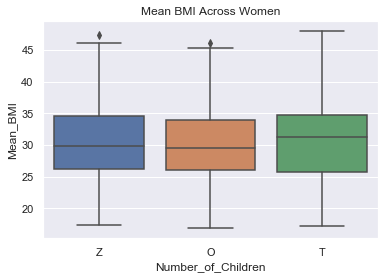

In [64]:
sns.boxplot(x = "Number_of_Children", y = "Mean_BMI", data = mean_bmi_df)
plt.title('Mean BMI Across Women')
plt.show()

### Insight 10 Mean BMI of women with 2 children is different and also having different shape.. Also that women with 0 or 1 Children have outliers

### Step 1: State the null and alternative hypothesis:

###
𝐻0 : 𝜇1 = 𝜇2 = 𝜇3 
###
𝐻𝐴: At least one 𝜇 differs 
###
Here 𝜇1, 𝜇2 and 𝜇3 are the mean BMI of women with 0 Children, 1 child, 2 children

### Step 2: Decide the significance level
Here we select α = 0.05

### Step 3: Identify the test statistic
Here we have three groups. Analysis of variance can determine whether the means of three or more groups are different. ANOVA uses F-tests to statistically test the equality of means.

### Step 4: Calculate p value using ANOVA table
statsmodels.formula.api.ols creates a model from a formula and dataframe
statsmodels.api.sm.stats.anova_lm gives an Anova table for one or more fitted linear models

In [68]:
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols
 
mod = ols('Mean_BMI ~ Number_of_Children', data = mean_bmi_df).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                          sum_sq     df         F    PR(>F)
Number_of_Children     24.590123    2.0  0.334472  0.715858
Residual            20695.661583  563.0       NaN       NaN


### Step 5: Decide to reject or accept null hypothesis

In this example, p value is 0.715858 and it is higher than our chosen level of signifance at 5%

So the statistical decision is FAIL to reject the null hypothesis at 5% level of significance Or Accept the Null Hypothesis

### So there is No sufficient evidence to reject the null hypothesis  

### Determine which mean(s) is / are same/similar
An ANOVA test will test that at least one mean is different.
You have Failed to reject the null hypothesis but do not know which mean(s) is / are different. We use Tukey-krammer HSD test to detect which mean(s) is / are different.

In [70]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
print(pairwise_tukeyhsd(mean_bmi_df['Mean_BMI'], mean_bmi_df['Number_of_Children']))

Multiple Comparison of Means - Tukey HSD,FWER=0.05
group1 group2 meandiff  lower  upper  reject
--------------------------------------------
  O      T     0.5971  -1.1323 2.3265 False 
  O      Z     0.3089  -1.1008 1.7186 False 
  T      Z    -0.2883  -1.8402 1.2636 False 
--------------------------------------------


### Inference
Women with 0 Children Vs Women with 1 child: Since the result - reject is False, mean BMI is statistically NOT different between the Two sets under comparison.

Women with 0 Children Vs Women with 2 Children: Since the result - reject is False, mean BMI is statistically NOT different between the Two sets under comparison.

Women with 2 Children Vs Women with 1 Child:  Since the result - reject is False, mean BMI is statistically NOT different between the Two sets under comparison.